In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage

BCR = 0.5502797761790568


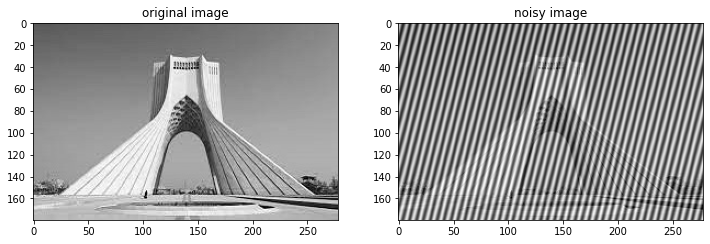

In [37]:
def BCR(img1, img2):
  [M,N] = img1.shape
  temp = np.logical_xor(img1,img2)
  S = np.sum(np.sum(temp))
  bcr = 1-(S/(M*N))
  return bcr

img = np.array(cv2.imread(filename="azadi_tower.jpg", flags=cv2.IMREAD_GRAYSCALE)).astype('uint8')
img_norm = np.array(cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX))


[m, n] = img.shape
[a, b] = np.meshgrid(range(0, n), range(0, m))

periodic_noise = np.sin(a+b/4)+1
noisy_img = (img_norm + periodic_noise)/2
noisy_img = np.array(cv2.normalize(noisy_img.astype('float'), None, 0.0, 255.0, cv2.NORM_MINMAX)).astype('uint8')


thresh_val, org_img_binary = cv2.threshold(src=img, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
thresh_val, noisy_img_binary = cv2.threshold(src=noisy_img, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

print("BCR = {}".format(BCR(org_img_binary, noisy_img_binary)))

fig, axes= plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('original image')

axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title('noisy image')

plt.show()

